### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset
* In this model we will generate a dataset from np.random() for equation y = 0.8x^2 + 0.9x + 2

In [2]:
x = 6 * np.random.rand(200,1) - 3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200,1)  # y = 0.8x^2 + 0.9x + 2

### Graph
* Plotting 'x' & 'y' to check the connection between x & y.

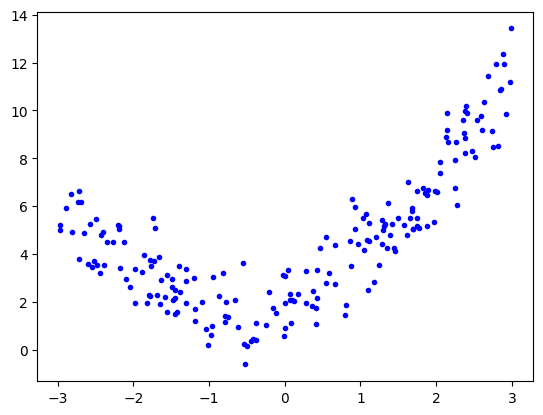

In [37]:
plt.plot(x,y,'b.')

* Here we can see that the points do not have a linear connection between them and hence, we can't apply linear regression without having some polynomial terms to find the best fit line.

### Train-test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### From sklearn import polynomial regression for model training.

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly = PolynomialFeatures(degree=2)

In [10]:
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [12]:
print(x_train[0])   #Before applying degree = 2
print(x_train_trans[0]) #After applying degree = 2, the model will give values for x^0, x^1, x^2

[-1.48273907]
[ 1.         -1.48273907  2.19851516]


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(x_train_trans, y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(x_train_trans)

### Accuracy

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_train, y_pred)

0.8827257227807103

In [23]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.97320517 0.77117106]]
[2.09730201]


### Plotting graph

In [25]:
x_new = np.linspace(-3,3,100).reshape(100,1)
x_new_trans = poly.transform(x_new)
y_new = lr.predict(x_new_trans)

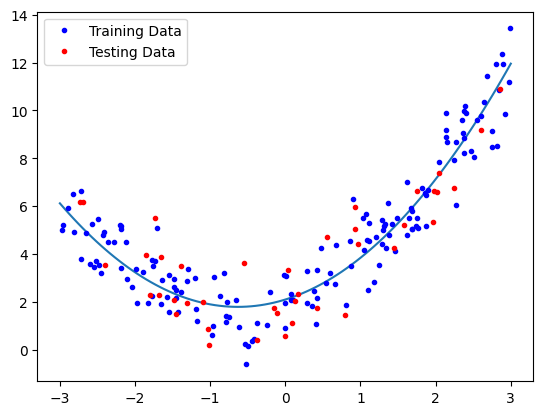

In [35]:
plt.plot(x_new, y_new)
plt.plot(x_train, y_train, 'b.', label='Training Data')
plt.plot(x_test, y_test, 'r.', label='Testing Data')
plt.legend()